# 1. DATA INPUT & PREPROCESSING

# Import Library

In [10]:
import warnings

In [11]:
warnings.filterwarnings ("ignore")

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from tabulate import tabulate

# Load Data Frame

In [13]:
path_file = r'E:\Data Science Project\Dataset\Extract\Data Set_1\Bank_Churn.csv'
df = pd.read_csv(path_file)
print(df)

      CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00      

# Info Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Preprocessing Data

In [15]:
df[['CustomerId', 
    'NumOfProducts' , 
    'Exited', 
    'IsActiveMember', 
    'HasCrCard', 
    'Tenure' ,
    'Age']] = df[['CustomerId', 
                  'NumOfProducts' , 
                  'Exited', 
                  'IsActiveMember', 
                  'HasCrCard',
                  'Tenure' ,
                  'Age']].astype(float)
df[['EstimatedSalary', 'Balance']] = df[['EstimatedSalary', 'Balance']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  float64
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  float64
 7   Balance          10000 non-null  int32  
 8   NumOfProducts    10000 non-null  float64
 9   HasCrCard        10000 non-null  float64
 10  IsActiveMember   10000 non-null  float64
 11  EstimatedSalary  10000 non-null  int32  
 12  Exited           10000 non-null  float64
dtypes: float64(7), int32(2), int64(1), object(3)
memory usage: 937.6+ KB


In [16]:
Zero_and_nul_df_check = df[(df.isnull()) | (df == 0) | (df == '')]
print(Zero_and_nul_df_check)  

      CustomerId Surname  CreditScore Geography Gender  Age  Tenure  Balance  \
0            NaN     NaN          NaN       NaN    NaN  NaN     NaN      0.0   
1            NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   
2            NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   
3            NaN     NaN          NaN       NaN    NaN  NaN     NaN      0.0   
4            NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   
...          ...     ...          ...       ...    ...  ...     ...      ...   
9995         NaN     NaN          NaN       NaN    NaN  NaN     NaN      0.0   
9996         NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   
9997         NaN     NaN          NaN       NaN    NaN  NaN     NaN      0.0   
9998         NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   
9999         NaN     NaN          NaN       NaN    NaN  NaN     NaN      NaN   

      NumOfProducts  HasCrCard  IsActiv

In [17]:
(df != '').all(axis=1)
print(df)

      CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0     15634602.0   Hargrave          619    France  Female  42.0     2.0   
1     15647311.0       Hill          608     Spain  Female  41.0     1.0   
2     15619304.0       Onio          502    France  Female  42.0     8.0   
3     15701354.0       Boni          699    France  Female  39.0     1.0   
4     15737888.0   Mitchell          850     Spain  Female  43.0     2.0   
...          ...        ...          ...       ...     ...   ...     ...   
9995  15606229.0   Obijiaku          771    France    Male  39.0     5.0   
9996  15569892.0  Johnstone          516    France    Male  35.0    10.0   
9997  15584532.0        Liu          709    France  Female  36.0     7.0   
9998  15682355.0  Sabbatini          772   Germany    Male  42.0     3.0   
9999  15628319.0     Walker          792    France  Female  28.0     4.0   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          

In [18]:
df.duplicated().sum()
df = df.drop_duplicates()
print (df)


      CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0     15634602.0   Hargrave          619    France  Female  42.0     2.0   
1     15647311.0       Hill          608     Spain  Female  41.0     1.0   
2     15619304.0       Onio          502    France  Female  42.0     8.0   
3     15701354.0       Boni          699    France  Female  39.0     1.0   
4     15737888.0   Mitchell          850     Spain  Female  43.0     2.0   
...          ...        ...          ...       ...     ...   ...     ...   
9995  15606229.0   Obijiaku          771    France    Male  39.0     5.0   
9996  15569892.0  Johnstone          516    France    Male  35.0    10.0   
9997  15584532.0        Liu          709    France  Female  36.0     7.0   
9998  15682355.0  Sabbatini          772   Germany    Male  42.0     3.0   
9999  15628319.0     Walker          792    France  Female  28.0     4.0   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          

In [19]:
df_active = df[df['IsActiveMember'] == 1]
print (df_active)

      CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0     15634602.0   Hargrave          619    France  Female  42.0     2.0   
1     15647311.0       Hill          608     Spain  Female  41.0     1.0   
4     15737888.0   Mitchell          850     Spain  Female  43.0     2.0   
6     15592531.0   Bartlett          822    France    Male  50.0     7.0   
8     15792365.0         He          501    France    Male  44.0     4.0   
...          ...        ...          ...       ...     ...   ...     ...   
9986  15581736.0   Bartlett          673   Germany    Male  47.0     1.0   
9987  15588839.0    Mancini          606     Spain    Male  30.0     8.0   
9989  15605622.0   McMillan          841     Spain    Male  28.0     4.0   
9996  15569892.0  Johnstone          516    France    Male  35.0    10.0   
9997  15584532.0        Liu          709    France  Female  36.0     7.0   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          

In [20]:
df_active_nonzero_balance = df[df['IsActiveMember'] == 1]
df_active_nonzero_balance = df_active_nonzero_balance[df_active_nonzero_balance['Balance'] > 0]
print(df_active_nonzero_balance)

      CustomerId         Surname  CreditScore Geography  Gender   Age  Tenure  \
1     15647311.0            Hill          608     Spain  Female  41.0     1.0   
4     15737888.0        Mitchell          850     Spain  Female  43.0     2.0   
8     15792365.0              He          501    France    Male  44.0     4.0   
9     15592389.0              H?          684    France    Male  27.0     2.0   
15    15643966.0         Goforth          616   Germany    Male  45.0     3.0   
...          ...             ...          ...       ...     ...   ...     ...   
9981  15672754.0        Burbidge          498   Germany    Male  42.0     3.0   
9984  15696175.0  Echezonachukwu          602   Germany    Male  35.0     7.0   
9986  15581736.0        Bartlett          673   Germany    Male  47.0     1.0   
9987  15588839.0         Mancini          606     Spain    Male  30.0     8.0   
9996  15569892.0       Johnstone          516    France    Male  35.0    10.0   

      Balance  NumOfProduct

# 2. DATA ANALYSIS

# Descriptive Statistic

In [21]:
df_active_nonzero_balance.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3.278000e+03,3278.000000,3278.000000,3278.000000,3278.000000,3278.000000,3278.000000,3278.0,3278.000000,3278.000000
mean,1.569053e+07,654.057657,39.841367,4.859671,119228.996949,1.382550,0.690970,1.0,99955.768456,0.169311
std,7.281344e+04,95.285886,11.546003,2.920859,30344.129498,0.560712,0.462164,0.0,57237.884406,0.375083
min,1.556571e+07,350.000000,18.000000,0.000000,16893.000000,1.000000,0.000000,1.0,11.000000,0.000000
25%,1.562563e+07,590.000000,32.000000,2.000000,99569.750000,1.000000,0.000000,1.0,50807.500000,0.000000
50%,1.569052e+07,655.000000,38.000000,5.000000,119624.000000,1.000000,1.000000,1.0,101286.500000,0.000000
75%,1.575504e+07,720.000000,45.000000,7.000000,139167.250000,2.000000,1.000000,1.0,149122.500000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.000000,4.000000,1.000000,1.0,199953.000000,1.000000


In [22]:
df_active_nonzero_balance.describe().applymap("{0:.2f}".format)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3278.00,3278.00,3278.00,3278.00,3278.00,3278.00,3278.00,3278.00,3278.00,3278.00
mean,15690532.05,654.06,39.84,4.86,119229.00,1.38,0.69,1.00,99955.77,0.17
std,72813.44,95.29,11.55,2.92,30344.13,0.56,0.46,0.00,57237.88,0.38
min,15565714.00,350.00,18.00,0.00,16893.00,1.00,0.00,1.00,11.00,0.00
25%,15625634.25,590.00,32.00,2.00,99569.75,1.00,0.00,1.00,50807.50,0.00
50%,15690522.50,655.00,38.00,5.00,119624.00,1.00,1.00,1.00,101286.50,0.00
75%,15755042.75,720.00,45.00,7.00,139167.25,2.00,1.00,1.00,149122.50,0.00
max,15815690.00,850.00,92.00,10.00,250898.00,4.00,1.00,1.00,199953.00,1.00


In [23]:
df_active_nonzero_balance.describe(exclude="number")

,Surname,Geography,Gender
count,3278,3278,3278
unique,1592,3,2
top,Smith,France,Male
freq,14,1331,1843


# Demography

Gender     Female  Male  Total
Geography                     
France        588   743   1331
Germany       559   689   1248
Spain         288   411    699


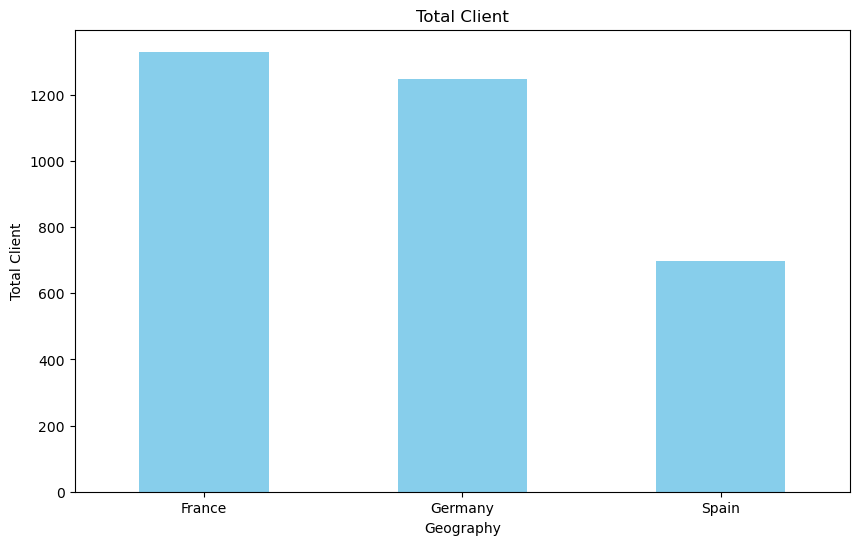

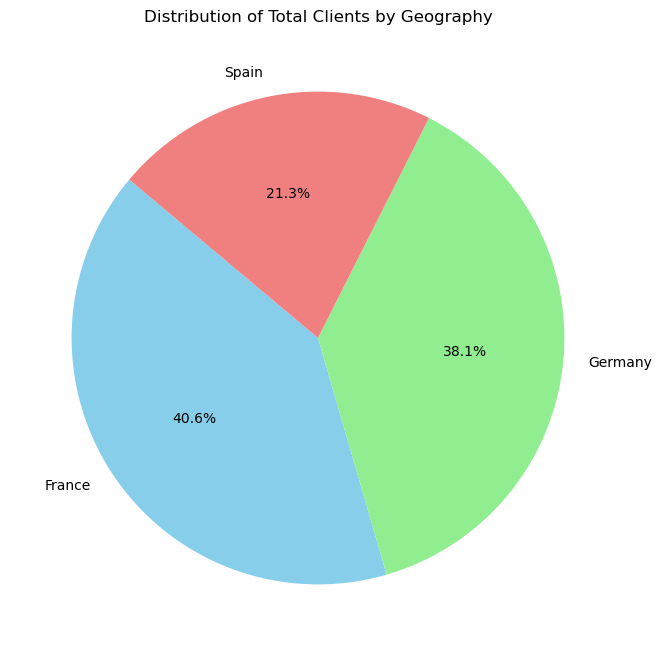

In [24]:

population_by_geo_gender = df_active_nonzero_balance.groupby(['Geography', 'Gender']).size().unstack()

population_by_geo_gender['Total'] = population_by_geo_gender['Male'] + population_by_geo_gender['Female']

print(population_by_geo_gender)

plt.figure(figsize=(10, 6))
population_by_geo_gender['Total'].plot(kind='bar', color='skyblue')
plt.title('Total Client')
plt.xlabel('Geography')
plt.ylabel('Total Client')
plt.xticks(rotation=0)
plt.show()

total_population_by_geo = population_by_geo_gender['Total']

plt.figure(figsize=(8, 8))
plt.pie(total_population_by_geo, labels=total_population_by_geo.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'], startangle=140)
plt.title('Distribution of Total Clients by Geography')
plt.show()


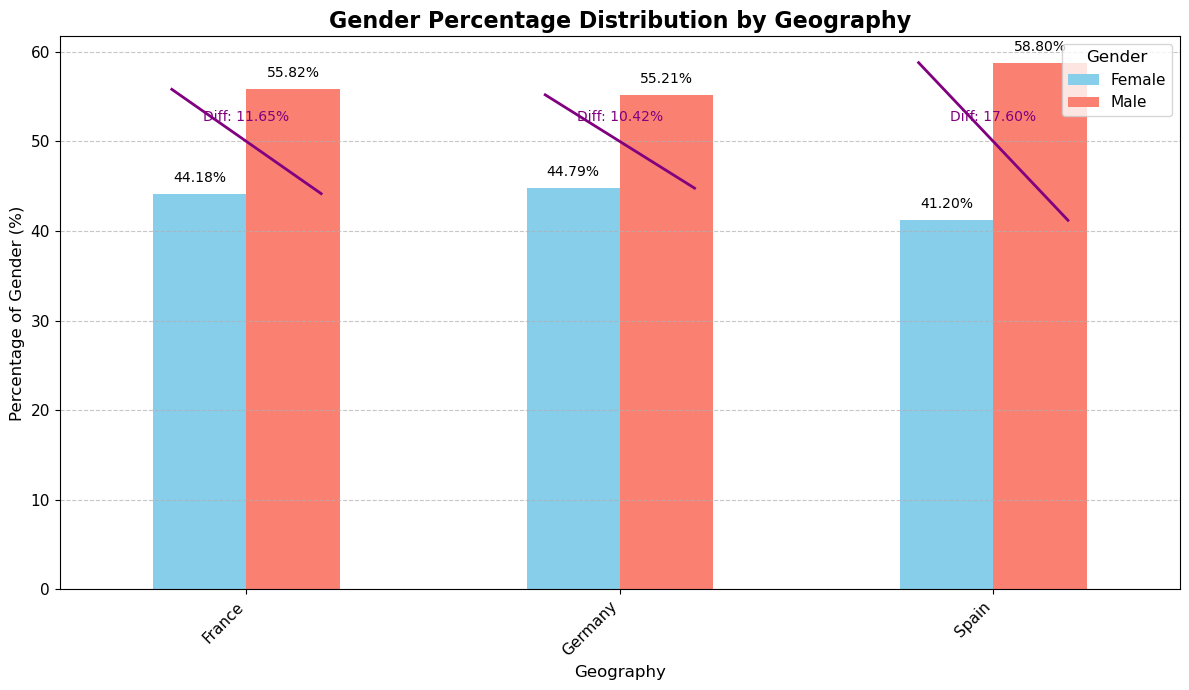

In [25]:
gender_by_geo = df_active_nonzero_balance.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

total_gender_by_geo = gender_by_geo.sum(axis=1)

gender_percentage_by_geo = gender_by_geo.divide(total_gender_by_geo, axis=0) * 100

ax = gender_percentage_by_geo.plot(kind='bar', stacked=False, figsize=(12, 7), color=['skyblue', 'salmon'])


plt.title('Gender Percentage Distribution by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Percentage of Gender (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:
    height = p.get_height()  # Tinggi bar (persentase)
    x_position = p.get_x() + p.get_width() / 2  # Posisi X dari bar
    ax.text(x_position, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, color='black')


male_percentage = gender_percentage_by_geo['Male']
female_percentage = gender_percentage_by_geo['Female']
difference = male_percentage - female_percentage

for i, geo in enumerate(gender_percentage_by_geo.index):
    male_x = i - 0.2  # Male berada sedikit di kiri
    female_x = i + 0.2  # Female berada sedikit di kanan
    
    ax.plot([male_x, female_x], [male_percentage[i], female_percentage[i]], color='purple', lw=2)

   
    ax.text((male_x + female_x) / 2, (male_percentage[i] + female_percentage[i]) / 2 + 2, 
            f'Diff: {difference[i]:.2f}%', ha='center', va='bottom', fontsize=10, color='purple')


plt.legend(title='Gender', fontsize=11, title_fontsize=12)
plt.tight_layout()  
plt.show()


In [26]:

contingency_table = gender_by_geo.T  


chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)


chi_square_results = pd.DataFrame({
    'Chi2 Stat': [chi2_stat],
    'p-value': [p_val],
    'Degree of Freedom': [dof],
    'Expected Values': [expected]
})


def highlight_significance(val):
    if isinstance(val, (int, float)):
        color = 'lightgreen' if val < 0.05 else 'lightcoral'
        return f'background-color: {color}'
    return ''

chi_square_results_styled = chi_square_results.style.applymap(highlight_significance, subset=['p-value'])


chi_square_results_styled


,Chi2 Stat,p-value,Degree of Freedom,Expected Values
0,2.492206,0.287623,2,[[582.66778523 546.33312996 305.99908481] [748.33221477 701.66687004 393.00091519]]


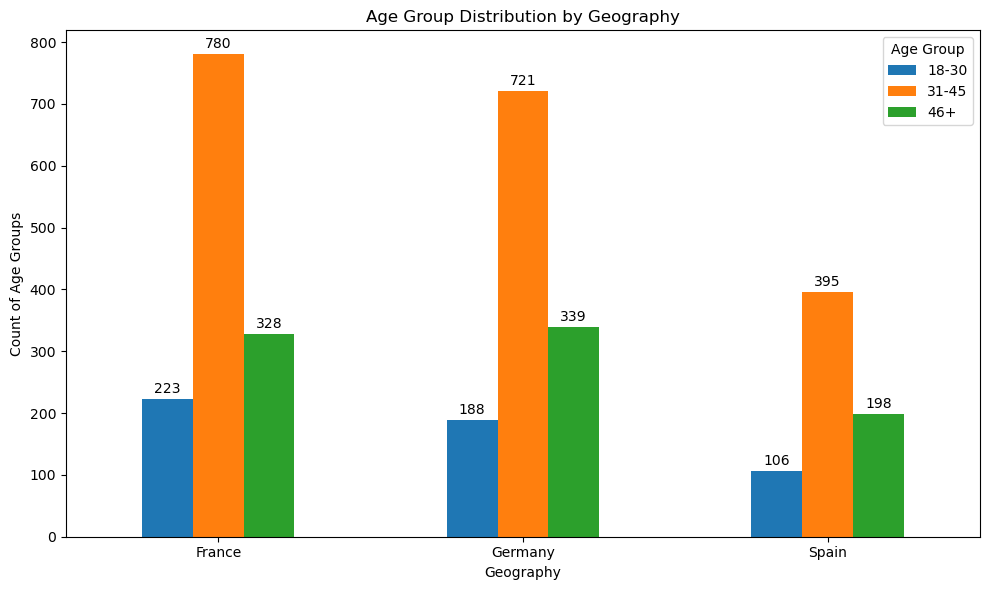

In [27]:

bins = [0, 30, 45, 100]
labels = ['18-30', '31-45', '46+']
df_active_nonzero_balance['Age Group'] = pd.cut(df_active_nonzero_balance['Age'], bins=bins, labels=labels, right=False)


age_by_geo = df_active_nonzero_balance.groupby(['Geography', 'Age Group']).size().unstack()


ax = age_by_geo.plot(kind='bar', stacked=False, figsize=(10, 6))


plt.title('Age Group Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count of Age Groups')
plt.xticks(rotation=0)


for p in ax.patches:
    
    height = p.get_height()
   
    x_position = p.get_x() + p.get_width() / 2
    
    ax.text(x_position, height + 5, str(int(height)), ha='center', va='bottom', fontsize=10)


plt.tight_layout()  
plt.show()


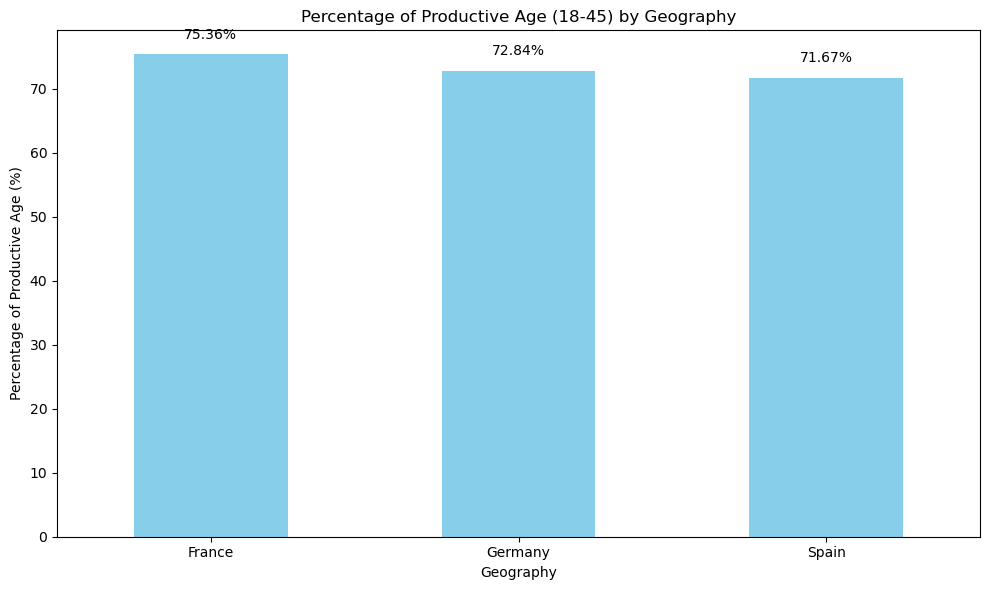

In [28]:

productive_age = age_by_geo[['18-30', '31-45']].sum(axis=1)


total_population = age_by_geo.sum(axis=1)


productive_percentage = (productive_age / total_population) * 100


plt.figure(figsize=(10, 6))
productive_percentage.plot(kind='bar', color='skyblue')


plt.title('Percentage of Productive Age (18-45) by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage of Productive Age (%)')
plt.xticks(rotation=0)


for i, v in enumerate(productive_percentage):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)


plt.tight_layout()  
plt.show()

In [29]:

age_categories = ['18-30', '31-45', '46+']
age_by_geo['Non-Productive'] = age_by_geo[['46+']].sum(axis=1)  
age_by_geo['Productive'] = age_by_geo[['18-30', '31-45']].sum(axis=1)  


contingency_table = age_by_geo[['Productive', 'Non-Productive']]


chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)


chi_square_results = pd.DataFrame({
    'Chi2 Stat': [chi2_stat],
    'p-value': [p_val],
    'Degree of Freedom': [dof],
    'Expected Values': [expected]
})


chi_square_results


def highlight_significance(val):
    if isinstance(val, (int, float)):
        color = 'lightgreen' if val < 0.05 else 'lightcoral'
        return f'background-color: {color}'
    return ''

chi_square_results_styled = chi_square_results.style.applymap(highlight_significance, subset=['p-value'])


chi_square_results_styled



,Chi2 Stat,p-value,Degree of Freedom,Expected Values
0,3.824317,0.147761,2,[[979.77516779 351.22483221] [918.67724222 329.32275778] [514.54758999 184.45241001]]


# Economy

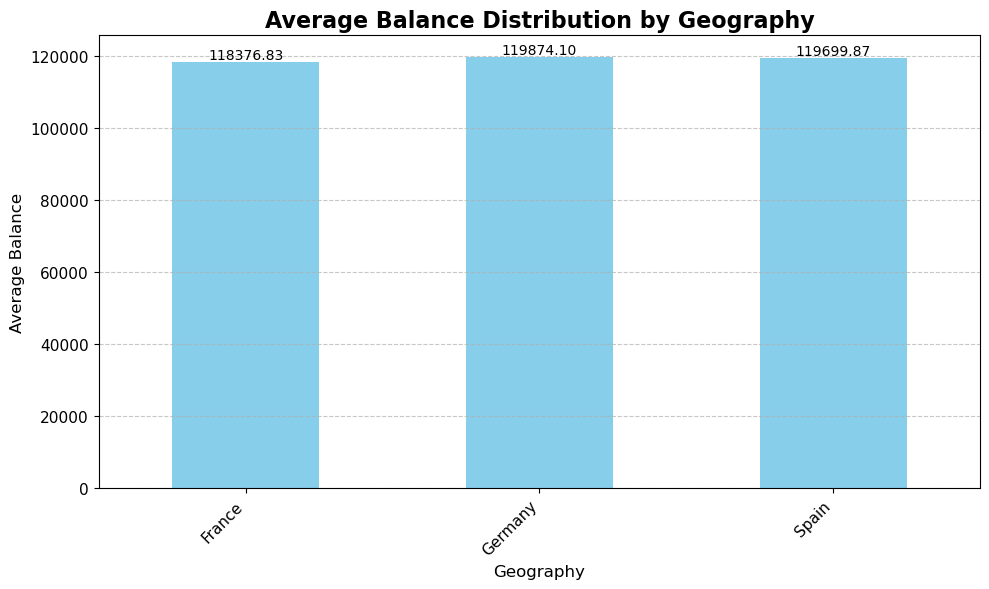

In [30]:


average_balance_by_geo = df_active_nonzero_balance.groupby('Geography')['Balance'].mean()


plt.figure(figsize=(10, 6))
average_balance_by_geo.plot(kind='bar', color='skyblue')


plt.title('Average Balance Distribution by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Average Balance', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(average_balance_by_geo):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()  
plt.show()


In [31]:

bins = [0, 5000, 10000, 20000, 50000, 100000, 200000]  
labels = ['0-5K', '5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+']  

df_active_nonzero_balance['Balance Range'] = pd.cut(df_active_nonzero_balance['Balance'], bins=bins, labels=labels, right=False)

average_balance_by_range = df_active_nonzero_balance.groupby(['Geography', 'Balance Range'])['Balance'].mean().unstack()

print("Rata-rata Balance per Rentang untuk setiap Negara:")
print(average_balance_by_range)


Rata-rata Balance per Rentang untuk setiap Negara:
Balance Range  0-5K  5K-10K  10K-20K       20K-50K      50K-100K  \
Geography                                                          
France          NaN     NaN  16893.0  41601.190476  82233.039548   
Germany         NaN     NaN      NaN  39335.166667  84685.851145   
Spain           NaN     NaN      NaN  41685.333333  82925.201117   

Balance Range          100K+  
Geography                     
France         132914.646251  
Germany        130253.134635  
Spain          132448.588583  


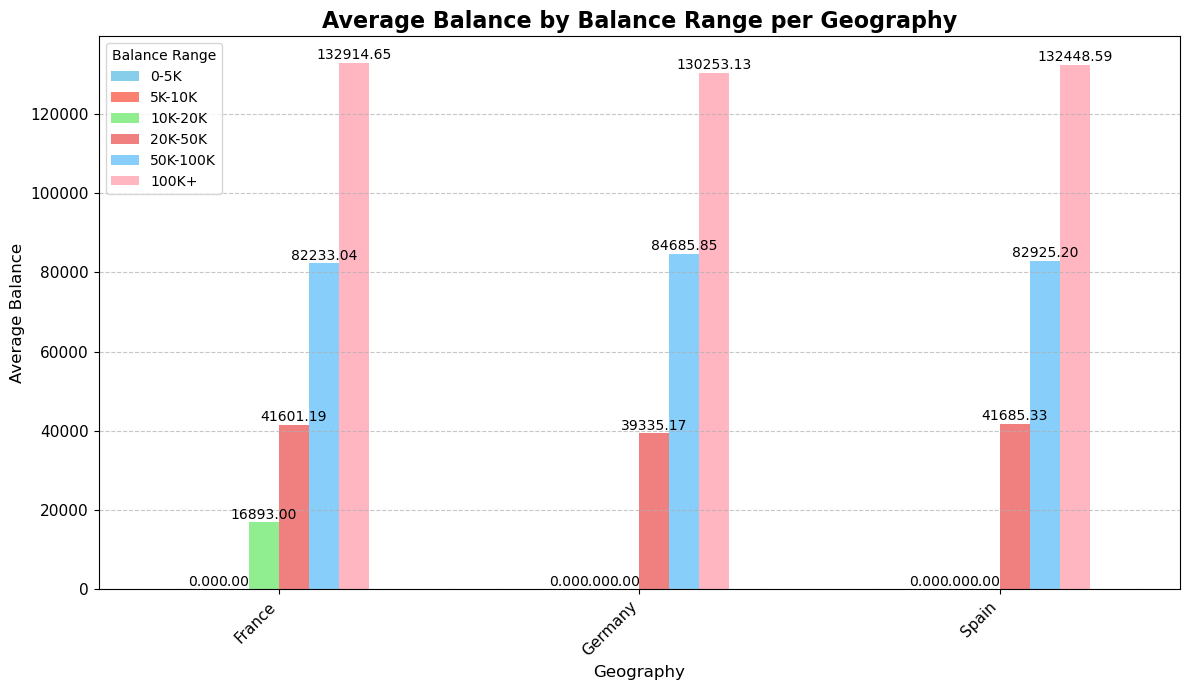

In [32]:

ax = average_balance_by_range.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])


plt.title('Average Balance by Balance Range per Geography', fontsize=16, fontweight='bold')
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Average Balance', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, p in enumerate(ax.patches):
    height = p.get_height()  
    x_position = p.get_x() + p.get_width() / 2  
    ax.text(x_position, height + 200, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()  
plt.show()

In [33]:
total_balance_by_geo = df_active_nonzero_balance.groupby('Geography')['Balance'].sum()


balance_range_total_by_geo = df_active_nonzero_balance.groupby(['Geography', 'Balance Range'])['Balance'].sum().unstack()


percentage_balance_by_geo = balance_range_total_by_geo.divide(total_balance_by_geo, axis=0) * 100


print("Persentase kontribusi Balance Range terhadap total balance per Geography:")
print(percentage_balance_by_geo)
print(tabulate(percentage_balance_by_geo, headers='keys', tablefmt='pretty', showindex=True))


Persentase kontribusi Balance Range terhadap total balance per Geography:
Balance Range  0-5K  5K-10K   10K-20K   20K-50K   50K-100K      100K+
Geography                                                            
France          0.0     0.0  0.010722  0.554473  18.475867  79.887357
Germany         0.0     0.0  0.000000  0.315517  14.831060  84.715145
Spain           0.0     0.0  0.000000  0.298926  17.740617  80.415582
+-----------+------+--------+----------------------+---------------------+--------------------+-------------------+
| Geography | 0-5K | 5K-10K |       10K-20K        |       20K-50K       |      50K-100K      |       100K+       |
+-----------+------+--------+----------------------+---------------------+--------------------+-------------------+
|  France   | 0.0  |  0.0   | 0.010721659592315573 | 0.5544728503721478  | 18.47586744068337  | 79.88735663096502 |
|  Germany  | 0.0  |  0.0   |         0.0          | 0.31551664682825664 | 14.831059773092742 | 84.7151454962268

In [34]:
from scipy import stats
anova_data = {}

for geography in df_active_nonzero_balance['Geography'].unique():
  
    balances = df_active_nonzero_balance[df_active_nonzero_balance['Geography'] == geography]
    
   
    for balance_range in balances['Balance Range'].unique():
        
        balance_values = balances[balances['Balance Range'] == balance_range]['Balance']
        
        
        if balance_range not in anova_data:
            anova_data[balance_range] = []
        anova_data[balance_range].append(balance_values)


anova_results = {}
for balance_range, values in anova_data.items():
   
    if len(values) > 1:  
        f_statistic, p_value = stats.f_oneway(*values)
        anova_results[balance_range] = {'F-statistic': f_statistic, 'p-value': p_value}


print("Hasil ANOVA untuk setiap Balance Range:")
for balance_range, result in anova_results.items():
    print(f"Balance Range: {balance_range} -> F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")

Hasil ANOVA untuk setiap Balance Range:
Balance Range: 50K-100K -> F-statistic: 3.002051113013291, p-value: 0.05025078463740496
Balance Range: 100K+ -> F-statistic: 4.116999344926805, p-value: 0.01640735504461972
Balance Range: nan -> F-statistic: nan, p-value: nan
Balance Range: 20K-50K -> F-statistic: 0.4387416546434464, p-value: 0.6482493077061886


In [35]:

contingency_table = pd.crosstab(df_active_nonzero_balance['Geography'], df_active_nonzero_balance['Balance Range'])


chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)


print("Hasil Uji Chi-Square:")
print(f"Chi-Squared Statistic: {chi2_statistic}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara balance range di masing-masing geography (tolak H0).")
else:
    print("Tidak terdapat perbedaan signifikan antara balance range di masing-masing geography (gagal tolak H0).")

Hasil Uji Chi-Square:
Chi-Squared Statistic: 17.57171424015698
p-value: 0.007396564707865621
Degrees of Freedom: 6
Expected Frequencies:
[[4.05455103e-01 1.58127490e+01 3.22336807e+02 9.84444989e+02]
 [3.82163653e-01 1.49043825e+01 3.03820104e+02 9.27893350e+02]
 [2.12381244e-01 8.28286853e+00 1.68843089e+02 5.15661661e+02]]
Terdapat perbedaan signifikan antara balance range di masing-masing geography (tolak H0).


EDA (Exploratory Data Analysis)

In [36]:

descriptive_stats = df_active_nonzero_balance.groupby('Geography')[['Balance', 'CreditScore', 'EstimatedSalary']].describe()
print(descriptive_stats)

          Balance                                                             \
            count           mean           std      min        25%       50%   
Geography                                                                      
France     1331.0  118376.831705  32187.795574  16893.0   96991.50  118636.0   
Germany    1248.0  119874.104968  27508.010269  27288.0  103344.25  120419.0   
Spain       699.0  119699.865522  31535.776646  28649.0   98654.50  119656.0   

                               CreditScore              ...                \
                 75%       max       count        mean  ...    75%    max   
Geography                                               ...                 
France     139967.00  238387.0      1331.0  654.586026  ...  720.0  850.0   
Germany    137939.25  206868.0      1248.0  654.615385  ...  724.0  850.0   
Spain      139863.50  250898.0       699.0  652.055794  ...  714.0  850.0   

          EstimatedSalary                               

          Balance                                                             \
            count           mean           std      min        25%       50%   
Geography                                                                      
France     1331.0  118376.831705  32187.795574  16893.0   96991.50  118636.0   
Germany    1248.0  119874.104968  27508.010269  27288.0  103344.25  120419.0   
Spain       699.0  119699.865522  31535.776646  28649.0   98654.50  119656.0   

                               CreditScore              ... HasCrCard       \
                 75%       max       count        mean  ...       75%  max   
Geography                                               ...                  
France     139967.00  238387.0      1331.0  654.586026  ...       1.0  1.0   
Germany    137939.25  206868.0      1248.0  654.615385  ...       1.0  1.0   
Spain      139863.50  250898.0       699.0  652.055794  ...       1.0  1.0   

          IsActiveMember                          

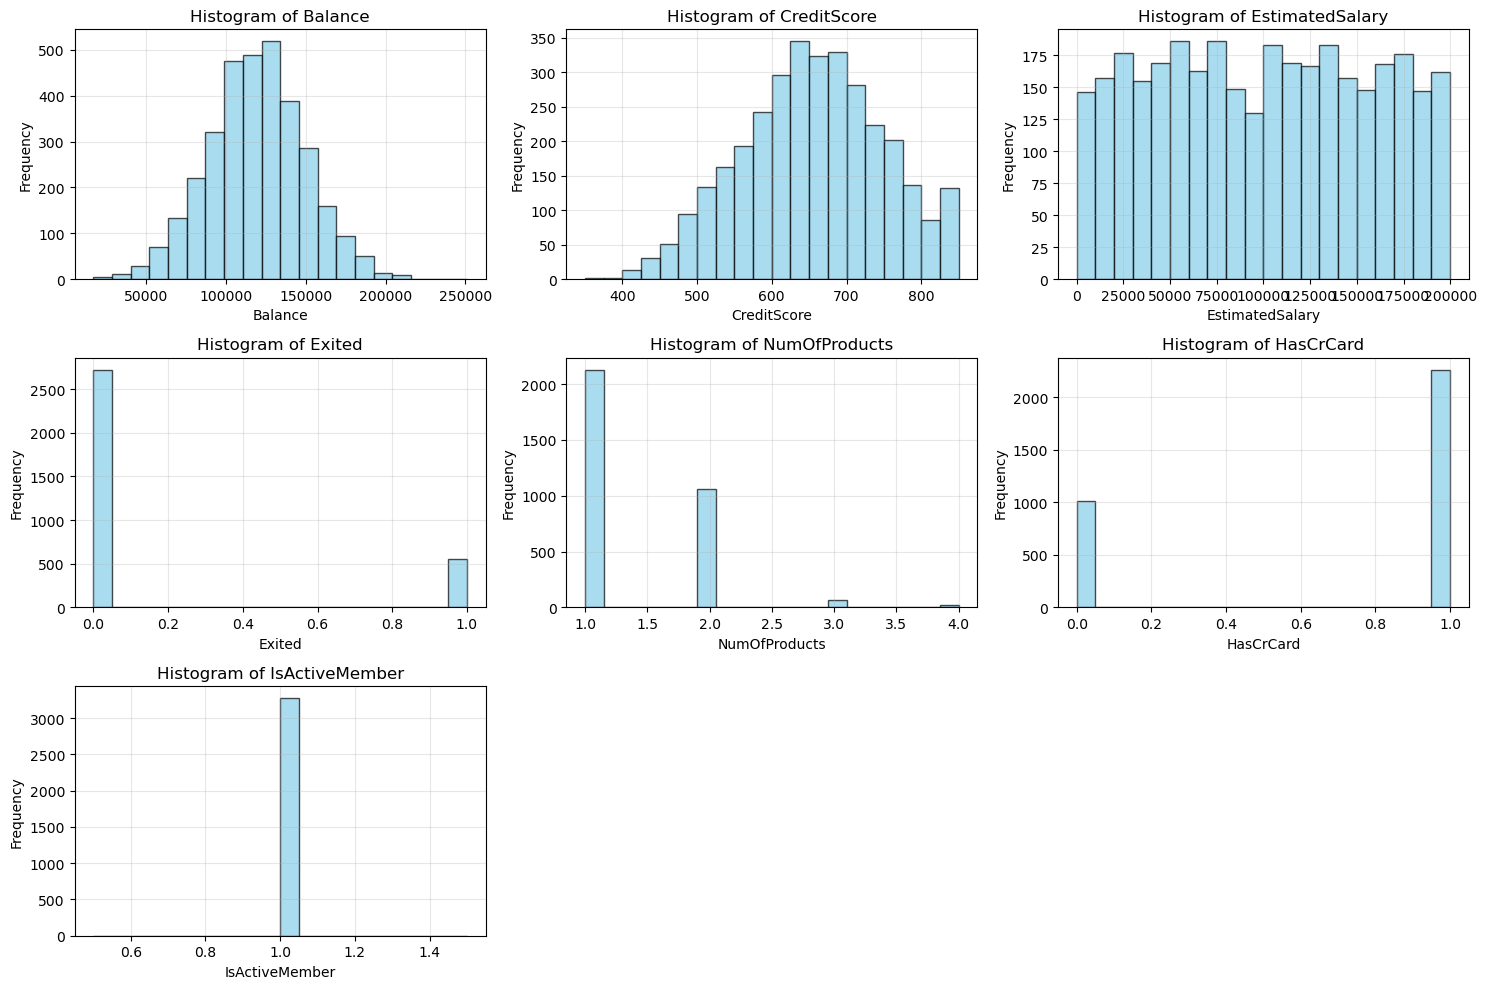

In [37]:

descriptive_stats = df_active_nonzero_balance.groupby('Geography')[['Balance', 'CreditScore', 'EstimatedSalary', 'Exited','NumOfProducts', 'HasCrCard', 'IsActiveMember']].describe()
print(descriptive_stats)

columns = ['Balance', 'CreditScore', 'EstimatedSalary', 'Exited', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


plt.figure(figsize=(15, 10))  
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  
    plt.hist(df_active_nonzero_balance[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3) 


plt.tight_layout()
plt.show()

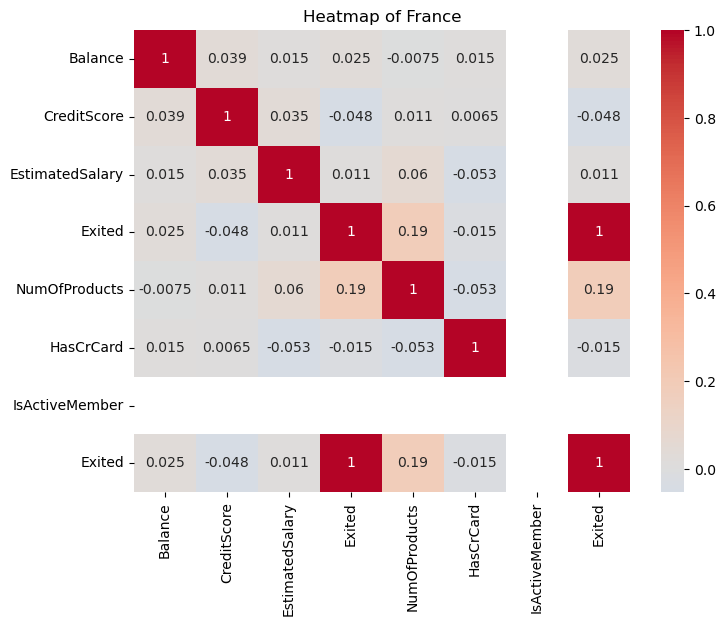

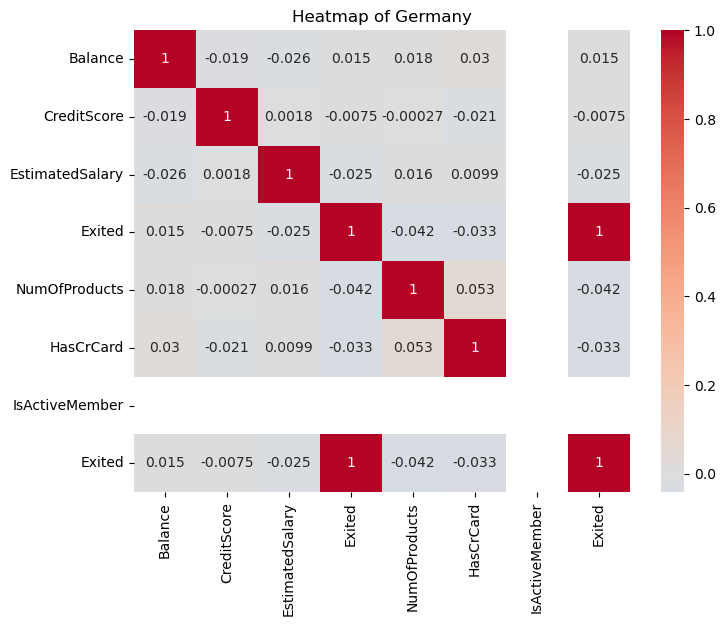

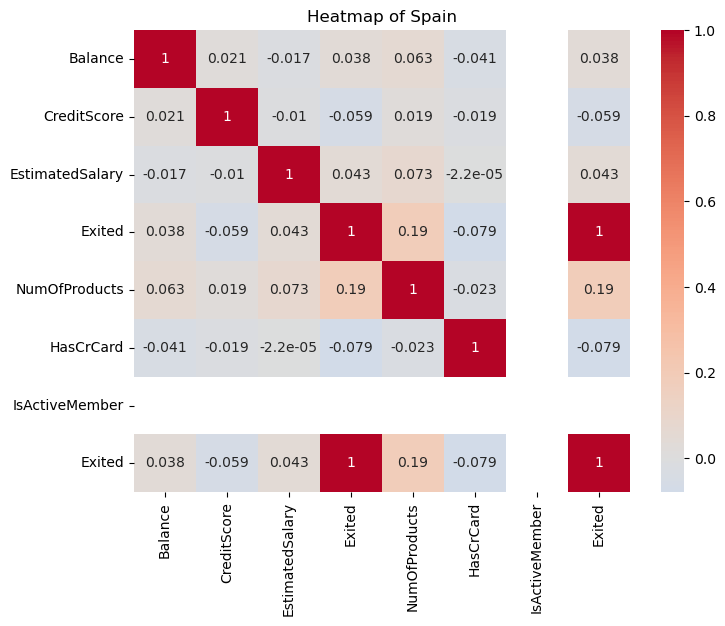

In [38]:

df_france = df_active_nonzero_balance[df_active_nonzero_balance['Geography'] == 'France']
df_germany = df_active_nonzero_balance[df_active_nonzero_balance['Geography'] == 'Germany']
df_spain = df_active_nonzero_balance[df_active_nonzero_balance['Geography'] == 'Spain']


def plot_heatmap(data, country):
    plt.figure(figsize=(8, 6))
    heatmap_data = data[['Balance', 'CreditScore', 'EstimatedSalary', 'Exited','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].corr()
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Heatmap of {country}')
    plt.show()


plot_heatmap(df_france, 'France')
plot_heatmap(df_germany, 'Germany')
plot_heatmap(df_spain, 'Spain')


def correlation_analysis(data, country):
    correlation_matrix = data[['Balance', 'CreditScore', 'EstimatedSalary', 'Exited','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].corr()
    
    print(f"Correlation Matrix for {country}:")
    print(correlation_matrix)


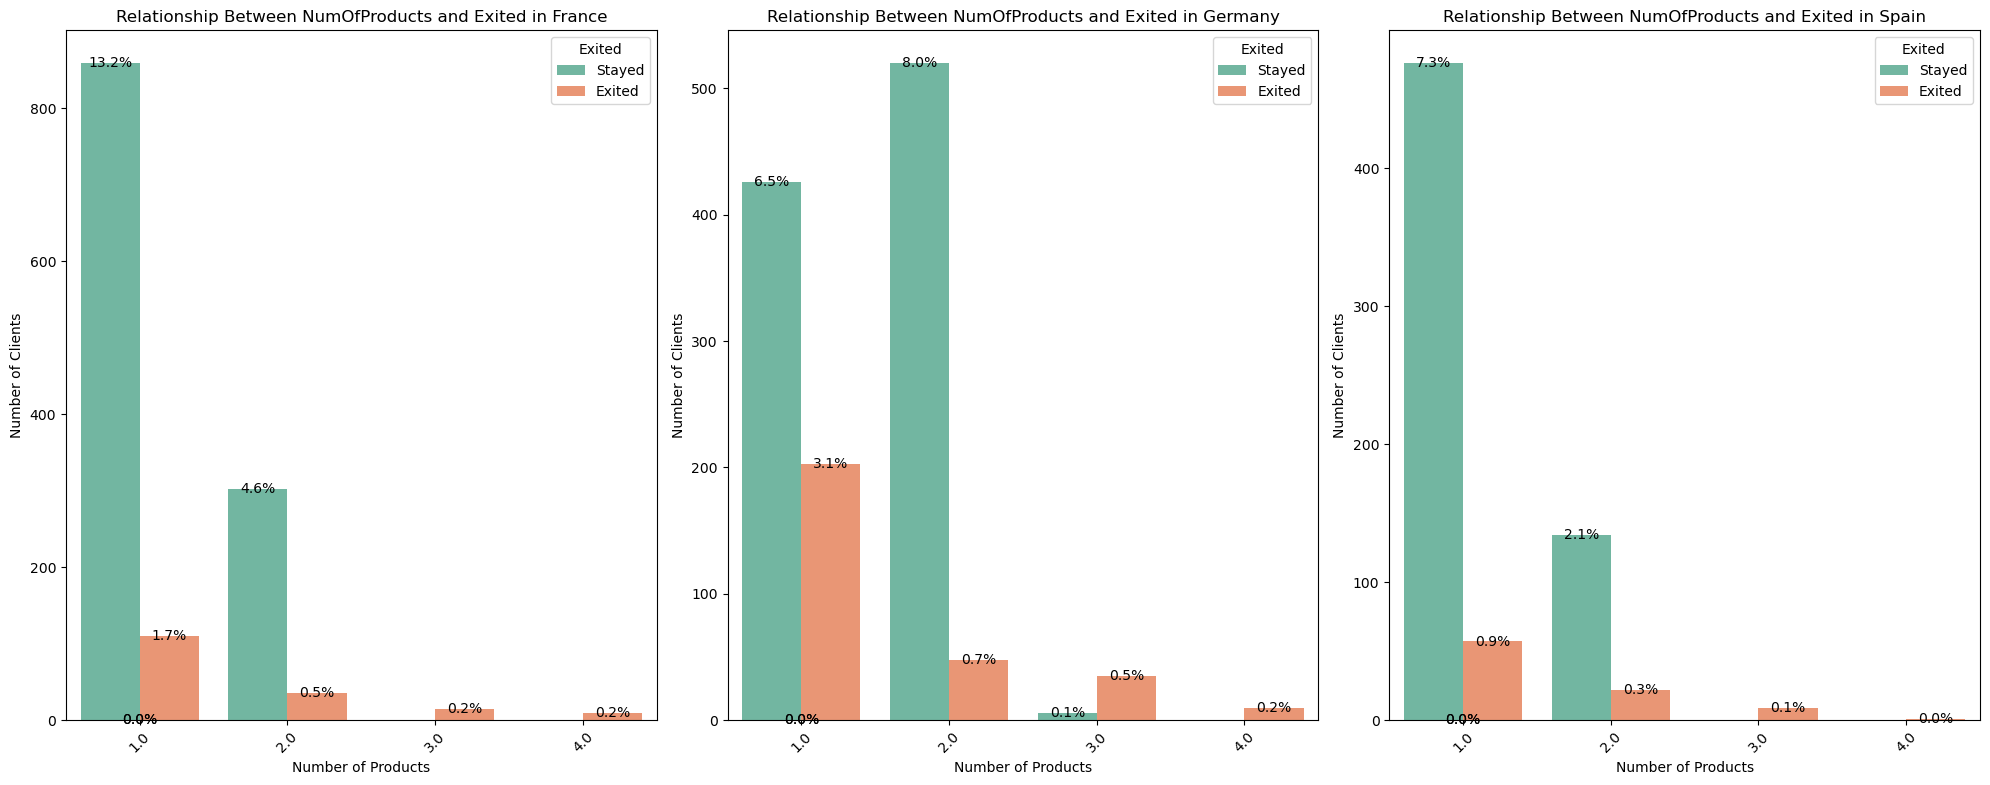

In [39]:

# Menghitung jumlah nasabah yang keluar (Exited) berdasarkan Geography dan NumOfProducts
exit_by_geo_numofproducts = df_active_nonzero_balance.groupby(['Geography', 'NumOfProducts', 'Exited']).size().reset_index(name='Count')

# Menghitung total nasabah untuk setiap kombinasi Geography dan NumOfProducts
total_by_geo_numofproducts = exit_by_geo_numofproducts.groupby(['Geography', 'NumOfProducts'])['Count'].transform('sum')

# Menambahkan kolom untuk menghitung persentase Exited dalam setiap grup
exit_by_geo_numofproducts['Percentage'] = (exit_by_geo_numofproducts['Count'] / total_by_geo_numofproducts) * 100

# Menentukan Geography untuk plot terpisah
geographies = exit_by_geo_numofproducts['Geography'].unique()

# Membuat plot untuk setiap Geography
plt.figure(figsize=(20, 15))

for i, geo in enumerate(geographies, 1):
    plt.subplot(2, 3, i)  # Menggunakan 2 baris, 3 kolom untuk subplot
    geo_data = exit_by_geo_numofproducts[exit_by_geo_numofproducts['Geography'] == geo]
    
    # Membuat bar plot untuk setiap Geography
    sns.barplot(x='NumOfProducts', y='Count', hue='Exited', data=geo_data, ci=None, palette='Set2')
    
    # Menambahkan persentase pada label
    for p in plt.gca().patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height / 2
        percentage = (height / total_by_geo_numofproducts.sum()) * 100  # Calculate percentage
        plt.text(x_position, height, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)

    # Menambahkan judul dan label untuk setiap subplot
    plt.title(f'Relationship Between NumOfProducts and Exited in {geo}', fontsize=12)
    plt.xlabel('Number of Products', fontsize=10)
    plt.ylabel('Number of Clients', fontsize=10)
    plt.xticks(rotation=45)
    plt.legend(title='Exited', labels=['Stayed', 'Exited'])

# Menyesuaikan layout agar tampilan lebih rapi
plt.tight_layout()
plt.show()


# 3. MACHINE LEARNING MODEL

# Scaler

In [40]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = ['Balance', 'CreditScore', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'HasCrCard']


scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("Data Sebelum Scaling:")
print(df)

print("\nData Setelah Scaling:")
print(df_scaled)

Data Sebelum Scaling:
      CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0     15634602.0   Hargrave          619    France  Female  42.0     2.0   
1     15647311.0       Hill          608     Spain  Female  41.0     1.0   
2     15619304.0       Onio          502    France  Female  42.0     8.0   
3     15701354.0       Boni          699    France  Female  39.0     1.0   
4     15737888.0   Mitchell          850     Spain  Female  43.0     2.0   
...          ...        ...          ...       ...     ...   ...     ...   
9995  15606229.0   Obijiaku          771    France    Male  39.0     5.0   
9996  15569892.0  Johnstone          516    France    Male  35.0    10.0   
9997  15584532.0        Liu          709    France  Female  36.0     7.0   
9998  15682355.0  Sabbatini          772   Germany    Male  42.0     3.0   
9999  15628319.0     Walker          792    France  Female  28.0     4.0   

      Balance  NumOfProducts  HasCrCard  IsActiveMember  Estimate

# Building Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


X = df[['Balance', 'CreditScore', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'HasCrCard']]
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC-AUC: {roc_auc}")
print(f"Decision Tree Performance ROC-AUC: {roc_auc}")

Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      1607
         1.0       0.30      0.35      0.32       393

    accuracy                           0.71      2000
   macro avg       0.56      0.57      0.57      2000
weighted avg       0.73      0.71      0.72      2000

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1607
         1.0       0.58      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Random Forest ROC-AUC: 0.7124254414924527
Decision Tree Performance ROC-AUC: 0.7124254414924527


# Model Evaluation

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Melatih Decision Tree
dt_model_resampled = DecisionTreeClassifier(random_state=42)
dt_model_resampled.fit(X_train_resampled, y_train_resampled)

# Prediksi dan Evaluasi
y_pred_dt_resampled = dt_model_resampled.predict(X_test)
print("Decision Tree Performance after Oversampling:")
print(classification_report(y_test, y_pred_dt_resampled, target_names=['Class 0', 'Class 1']))

# Evaluasi ROC-AUC
y_pred_proba_dt_resampled = dt_model_resampled.predict_proba(X_test)[:, 1]
roc_auc_dt_resampled = roc_auc_score(y_test, y_pred_proba_dt_resampled)
print(f"Decision Tree ROC-AUC after Oversampling: {roc_auc_dt_resampled}")


Decision Tree Performance after Oversampling:
              precision    recall  f1-score   support

     Class 0       0.84      0.81      0.83      1607
     Class 1       0.32      0.36      0.34       393

    accuracy                           0.72      2000
   macro avg       0.58      0.59      0.58      2000
weighted avg       0.74      0.72      0.73      2000

Decision Tree ROC-AUC after Oversampling: 0.5866976697052178


In [44]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score


undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Membuat kelas 0 dan kelas 1 seimbang
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


dt_model_undersampled = DecisionTreeClassifier(random_state=42)
dt_model_undersampled.fit(X_train_undersampled, y_train_undersampled)


y_pred_dt_undersampled = dt_model_undersampled.predict(X_test)


print("Decision Tree Performance after Undersampling:")
print(classification_report(y_test, y_pred_dt_undersampled, target_names=['Class 0', 'Class 1']))


y_pred_proba_dt_undersampled = dt_model_undersampled.predict_proba(X_test)[:, 1]
roc_auc_dt_undersampled = roc_auc_score(y_test, y_pred_proba_dt_undersampled)
print(f"Decision Tree ROC-AUC after Undersampling: {roc_auc_dt_undersampled}")


Decision Tree Performance after Undersampling:
              precision    recall  f1-score   support

     Class 0       0.85      0.59      0.70      1607
     Class 1       0.26      0.58      0.36       393

    accuracy                           0.59      2000
   macro avg       0.56      0.59      0.53      2000
weighted avg       0.74      0.59      0.63      2000

Decision Tree ROC-AUC after Undersampling: 0.588174985076423


In [45]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Membuat kelas 0 dan kelas 1 seimbang
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    #'class_weight': ['balanced', None]  # Menambahkan class_weight untuk menangani ketidakseimbangan kelas
}


dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)


grid_search.fit(X_train_undersampled, y_train_undersampled)


print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)


best_dt_model = grid_search.best_estimator_


y_pred_dt_best = best_dt_model.predict(X_test)


print("Decision Tree Performance after Hyperparameter Tuning (Undersampling):")
print(classification_report(y_test, y_pred_dt_best, target_names=['Class 0', 'Class 1']))


y_pred_proba_dt_best = best_dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt_best = roc_auc_score(y_test, y_pred_proba_dt_best)
print(f"Decision Tree ROC-AUC after Hyperparameter Tuning (Undersampling): {roc_auc_dt_best}")


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Performance after Hyperparameter Tuning (Undersampling):
              precision    recall  f1-score   support

     Class 0       0.91      0.50      0.64      1607
     Class 1       0.28      0.80      0.41       393

    accuracy                           0.56      2000
   macro avg       0.59      0.65      0.53      2000
weighted avg       0.79      0.56      0.60      2000

Decision Tree ROC-AUC after Hyperparameter Tuning (Undersampling): 0.6970498027871066


In [46]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # Membuat kelas 0 dan kelas 1 seimbang
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# 1. Random Forest Classifier
rf_model_undersampled = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_rf_undersampled = rf_model_undersampled.predict(X_test)
print("Random Forest Performance after Undersampling:")
print(classification_report(y_test, y_pred_rf_undersampled, target_names=['Class 0', 'Class 1']))
y_pred_proba_rf_undersampled = rf_model_undersampled.predict_proba(X_test)[:, 1]
roc_auc_rf_undersampled = roc_auc_score(y_test, y_pred_proba_rf_undersampled)
print(f"Random Forest ROC-AUC after Undersampling: {roc_auc_rf_undersampled}\n")

# 2. Logistic Regression
log_reg_model_undersampled = LogisticRegression(random_state=42)
log_reg_model_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_log_reg_undersampled = log_reg_model_undersampled.predict(X_test)
print("Logistic Regression Performance after Undersampling:")
print(classification_report(y_test, y_pred_log_reg_undersampled, target_names=['Class 0', 'Class 1']))
y_pred_proba_log_reg_undersampled = log_reg_model_undersampled.predict_proba(X_test)[:, 1]
roc_auc_log_reg_undersampled = roc_auc_score(y_test, y_pred_proba_log_reg_undersampled)
print(f"Logistic Regression ROC-AUC after Undersampling: {roc_auc_log_reg_undersampled}\n")

# 3. Gradient Boosting Classifier
gb_model_undersampled = GradientBoostingClassifier(random_state=42)
gb_model_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_gb_undersampled = gb_model_undersampled.predict(X_test)
print("Gradient Boosting Performance after Undersampling:")
print(classification_report(y_test, y_pred_gb_undersampled, target_names=['Class 0', 'Class 1']))
y_pred_proba_gb_undersampled = gb_model_undersampled.predict_proba(X_test)[:, 1]
roc_auc_gb_undersampled = roc_auc_score(y_test, y_pred_proba_gb_undersampled)
print(f"Gradient Boosting ROC-AUC after Undersampling: {roc_auc_gb_undersampled}")


Random Forest Performance after Undersampling:
              precision    recall  f1-score   support

     Class 0       0.88      0.63      0.73      1607
     Class 1       0.30      0.66      0.41       393

    accuracy                           0.63      2000
   macro avg       0.59      0.64      0.57      2000
weighted avg       0.77      0.63      0.67      2000

Random Forest ROC-AUC after Undersampling: 0.7003226976127027

Logistic Regression Performance after Undersampling:
              precision    recall  f1-score   support

     Class 0       0.86      0.46      0.60      1607
     Class 1       0.24      0.68      0.35       393

    accuracy                           0.50      2000
   macro avg       0.55      0.57      0.47      2000
weighted avg       0.73      0.50      0.55      2000

Logistic Regression ROC-AUC after Undersampling: 0.5826750333702266

Gradient Boosting Performance after Undersampling:
              precision    recall  f1-score   support

     Cla

# Prediction (Basecase)

In [47]:

importances = gb_model_undersampled.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importances    
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance[['Feature', 'Importance']])


           Feature  Importance
4    NumOfProducts    0.597567
0          Balance    0.188524
2  EstimatedSalary    0.103484
1      CreditScore    0.084574
3           Tenure    0.024461
5        HasCrCard    0.001388


In [48]:
coefficients = gb_model_undersampled.feature_importances_

odds_ratios = np.exp(coefficients)

odds_ratio_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Odds_Ratio': odds_ratios
})

odds_ratio_df = odds_ratio_df.sort_values(by='Odds_Ratio', ascending=False)

print(odds_ratio_df[['Feature', 'Odds_Ratio']])

           Feature  Odds_Ratio
4    NumOfProducts    1.817692
0          Balance    1.207466
2  EstimatedSalary    1.109028
1      CreditScore    1.088254
3           Tenure    1.024763
5        HasCrCard    1.001389


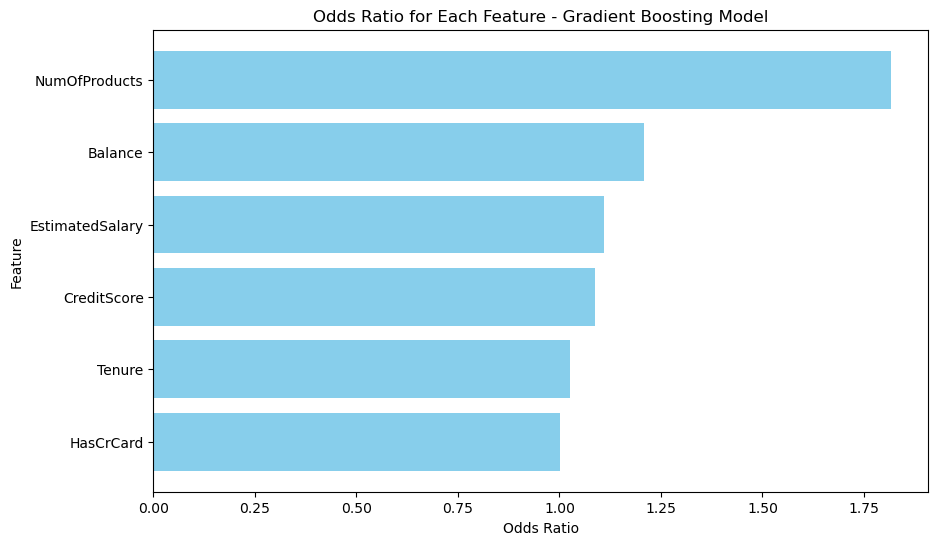

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(odds_ratio_df['Feature'], odds_ratio_df['Odds_Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratio for Each Feature - Gradient Boosting Model')
plt.gca().invert_yaxis()  
plt.show()

# Model Sensitivity

   NumOfProducts  Average_Exited_Probability
0              1                    0.603192
1              2                    0.288097
2              3                    0.918438
3              4                    0.923278


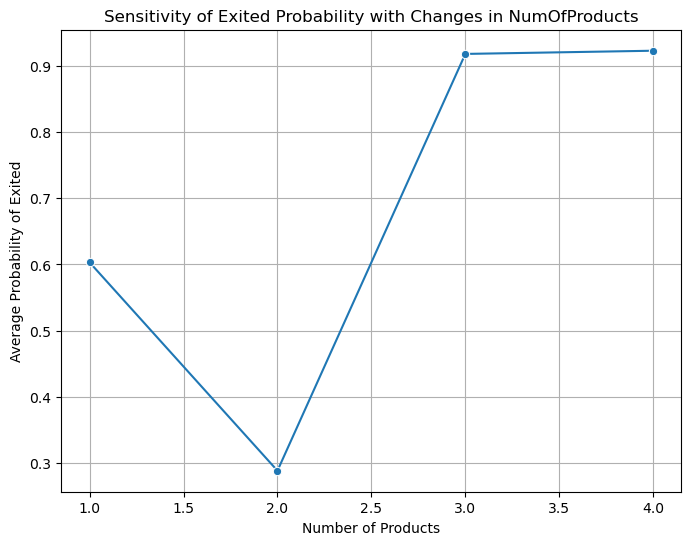

In [50]:

def sensitivity_analysis(model, X_data, feature_name, feature_values):
    sensitivities = []
    
 
    original_data = X_data.copy()

  
    for value in feature_values:
      
        X_copy = original_data.copy()
        
        
        X_copy[feature_name] = value
        
        
        probabilities = model.predict_proba(X_copy)[:, 1]  
        
      
        avg_probability = np.mean(probabilities)
        
      
        sensitivities.append({
            'NumOfProducts': value,
            'Average_Exited_Probability': avg_probability
        })
    
    return pd.DataFrame(sensitivities)

product_values = [1, 2, 3, 4]  
sensitivity_df = sensitivity_analysis(gb_model_undersampled, X_train, 'NumOfProducts', product_values)

print(sensitivity_df)

plt.figure(figsize=(8, 6))
sns.lineplot(x='NumOfProducts', y='Average_Exited_Probability', data=sensitivity_df, marker='o')
plt.title('Sensitivity of Exited Probability with Changes in NumOfProducts')
plt.xlabel('Number of Products')
plt.ylabel('Average Probability of Exited')
plt.grid(True)
plt.show()


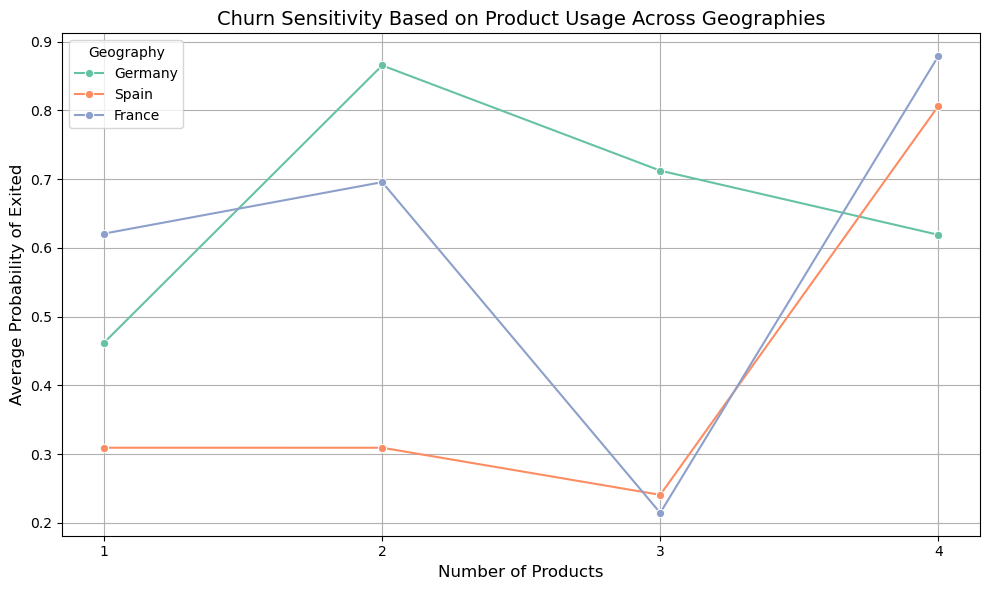

In [52]:

geographies = ['Germany', 'Spain', 'France']
num_products = [1, 2, 3, 4]
data = []

np.random.seed(42)  
for geo in geographies:
    for num_prod in num_products:
        avg_exited_prob = np.random.uniform(0.2, 0.9)  
        data.append({
            'Geography': geo,
            'NumOfProducts': num_prod,
            'Average_Exited_Probability': avg_exited_prob
        })

scenario_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=scenario_df,
    x='NumOfProducts',
    y='Average_Exited_Probability',
    hue='Geography',
    marker='o',
    palette='Set2'
)

plt.title('Churn Sensitivity Based on Product Usage Across Geographies', fontsize=14)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Average Probability of Exited', fontsize=12)
plt.xticks(num_products)
plt.grid(True)
plt.legend(title='Geography')
plt.tight_layout()

plt.show()



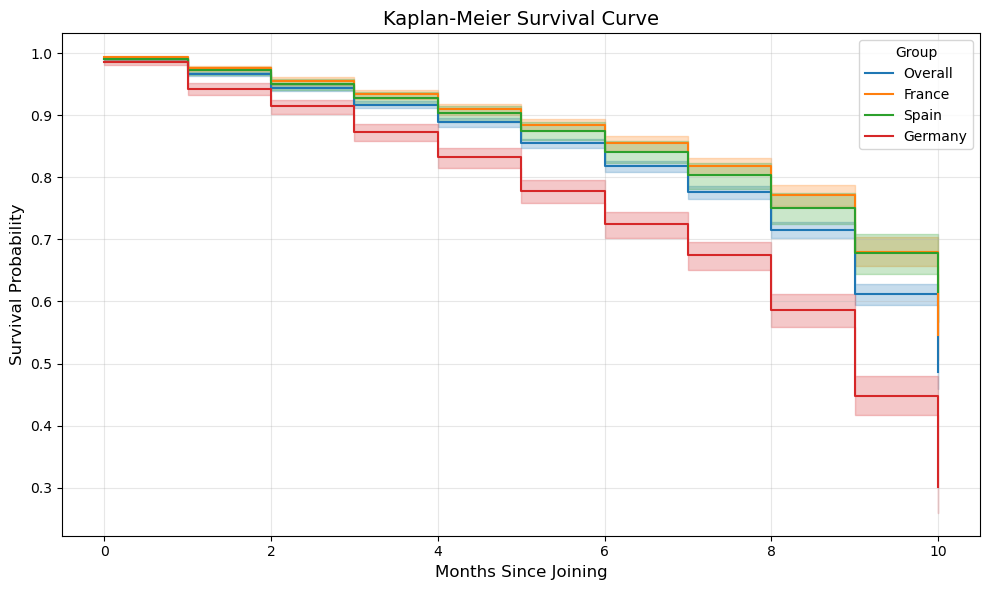

In [53]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(durations=df['Tenure'], event_observed=df['Exited'], label='Overall')
kmf.plot_survival_function(ci_show=True)

for geography in df['Geography'].unique():
    subset = df[df['Geography'] == geography]
    kmf.fit(durations=subset['Tenure'], event_observed=subset['Exited'], label=f'{geography}')
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Survival Curve', fontsize=14)
plt.xlabel('Months Since Joining', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.legend(title='Group', loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()